In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from scipy.spatial import distance
import scipy.cluster.hierarchy as sch
from FuncionesMineria2 import *

warnings.filterwarnings("ignore")
sns.set_theme()


#Cargar el conjunto de datos y entenderlo

In [397]:
# Instalar el paquete 'palmerpenguins'
!pip install palmerpenguins

# Cargar el conjunto de datos 'penguins' desde el paquete 'palmerpenguins'
from palmerpenguins import load_penguins
penguins = load_penguins()

# Eliminar filas con valores NaN en penguins
penguins = penguins.dropna()
penguins = penguins.reset_index(drop=True)

In [398]:
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [399]:
penguins.shape

(333, 8)

In [400]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [401]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [402]:
penguins['sex'].unique()

array(['male', 'female'], dtype=object)

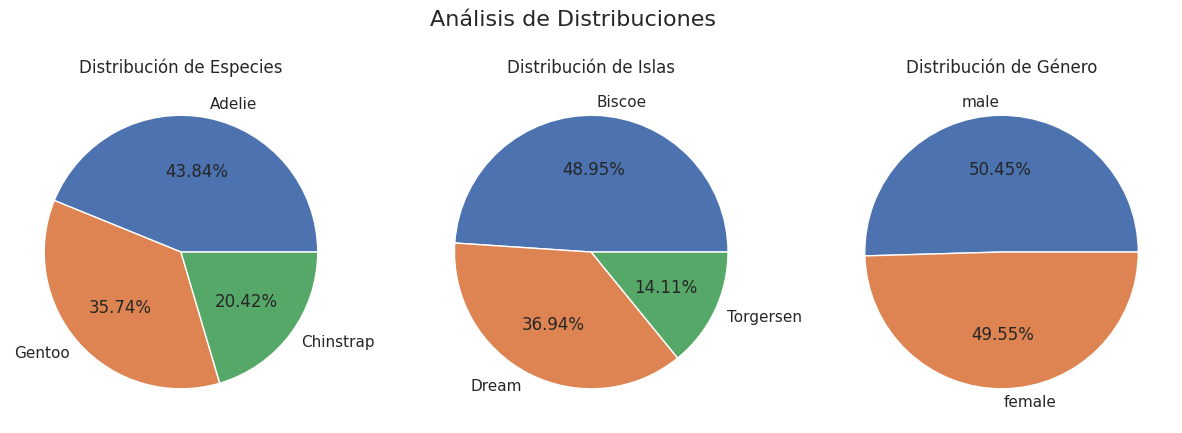

In [403]:
# Configuración de la figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para entender la distribución de las especies
Species = penguins.species.value_counts()
axes[0].pie(Species, labels=Species.index, autopct="%.2f%%")
axes[0].set_title("Distribución de Especies")

# Gráfico para entender la distribución de las islas
Island = penguins.island.value_counts()
axes[1].pie(Island, labels=Island.index, autopct="%.2f%%")
axes[1].set_title("Distribución de Islas")

# Gráfico para entender la distribución de género
Sex = penguins.sex.value_counts()
axes[2].pie(Sex, labels=Sex.index, autopct="%.2f%%")
axes[2].set_title("Distribución de Género")

# Ajustes de diseño y presentación
plt.suptitle("Análisis de Distribuciones", fontsize=16)
plt.show()

###Estadística descriptiva

In [404]:
# Obtener estadísticas descriptivas del conjunto de datos
descriptive_stats = penguins.describe()
display(descriptive_stats)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


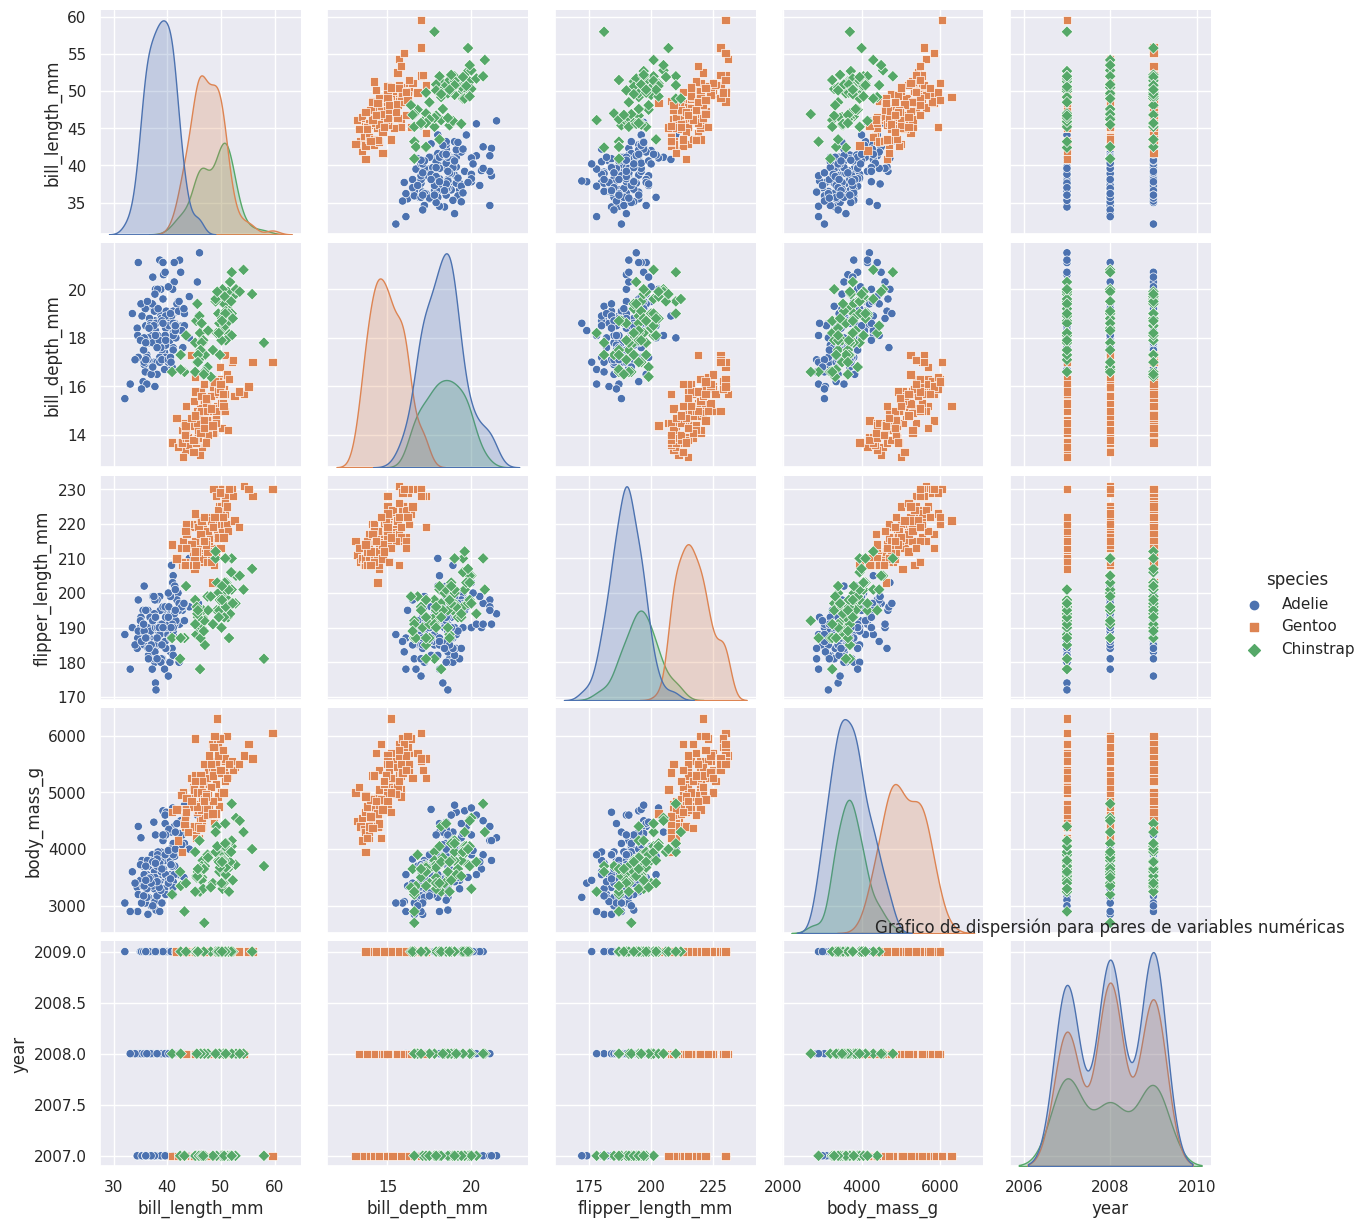

In [405]:
# Gráficos exploratorios
# Gráfico de dispersión para pares de variables numéricas
sns.pairplot(penguins, hue="species", markers=["o", "s", "D"])
plt.title("Gráfico de dispersión para pares de variables numéricas")
plt.show()


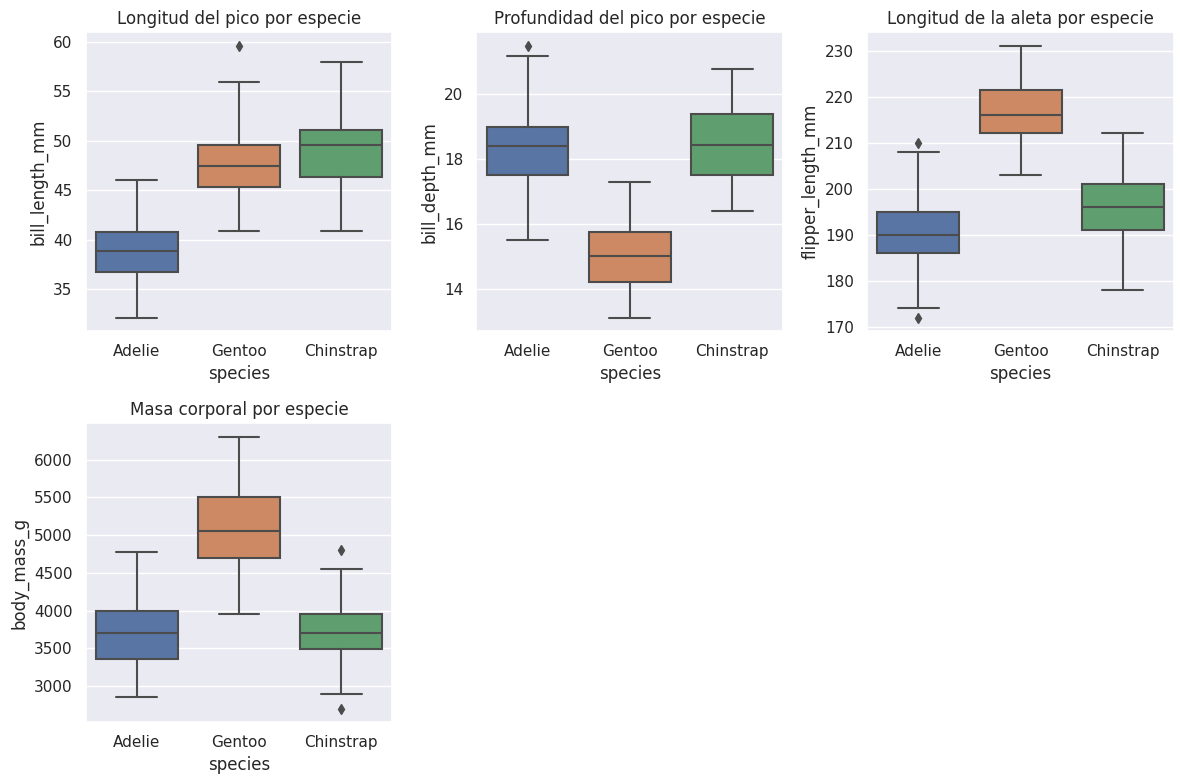

In [406]:
# Boxplot para cada variable numérica según la especie
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.boxplot(x="species", y="bill_length_mm", data=penguins)
plt.title("Longitud del pico por especie")

plt.subplot(2, 3, 2)
sns.boxplot(x="species", y="bill_depth_mm", data=penguins)
plt.title("Profundidad del pico por especie")

plt.subplot(2, 3, 3)
sns.boxplot(x="species", y="flipper_length_mm", data=penguins)
plt.title("Longitud de la aleta por especie")

plt.subplot(2, 3, 4)
sns.boxplot(x="species", y="body_mass_g", data=penguins)
plt.title("Masa corporal por especie")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Tamaño de la aleta')

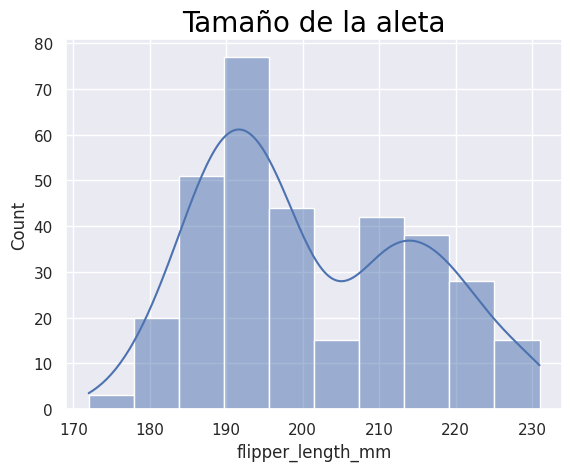

In [407]:
sns.histplot(x = "flipper_length_mm", data = penguins, kde = True)
plt.title("Tamaño de la aleta", size=20, color="Black")

Text(0.5, 1.0, 'Tamaño de la aleta por especie')

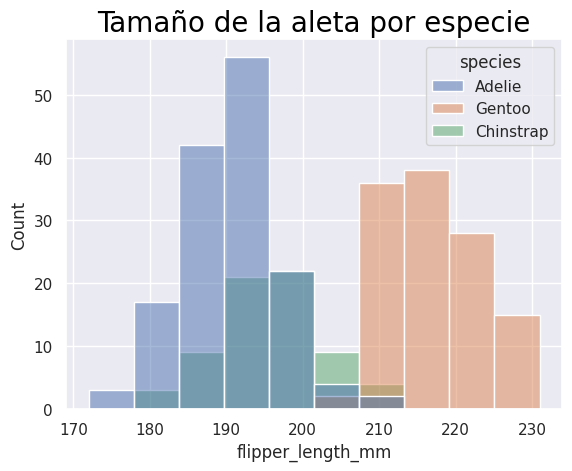

In [408]:
sns.histplot(x = "flipper_length_mm", data = penguins, hue = "species")
plt.title("Tamaño de la aleta por especie", size=20, color="Black")

###Gráfico de dispersión (Scatter Plot)

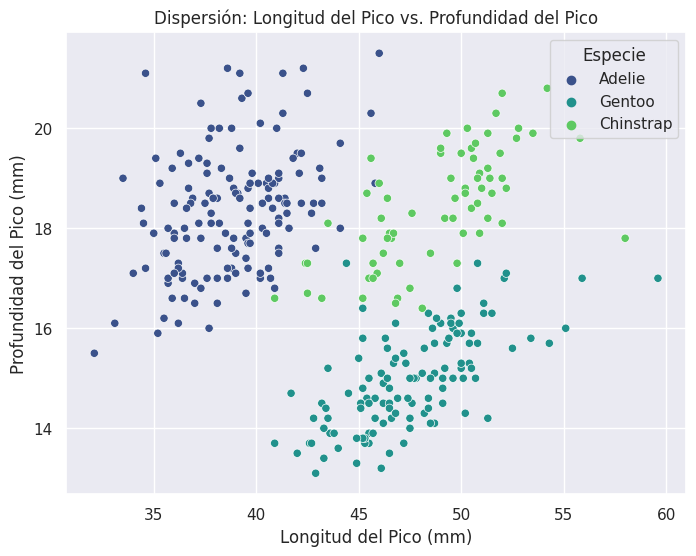

In [409]:
# Gráfico de dispersión para longitud del pico vs. profundidad del pico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins, palette='viridis')
plt.title('Dispersión: Longitud del Pico vs. Profundidad del Pico')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Profundidad del Pico (mm)')
plt.legend(title='Especie')
plt.show()

###Matriz de correlación

In [410]:
correlation_matrix = penguins.corr()
# Mostrar la matriz de correlación
print("\nMatriz de Correlación:")
display(correlation_matrix)


Matriz de Correlación:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


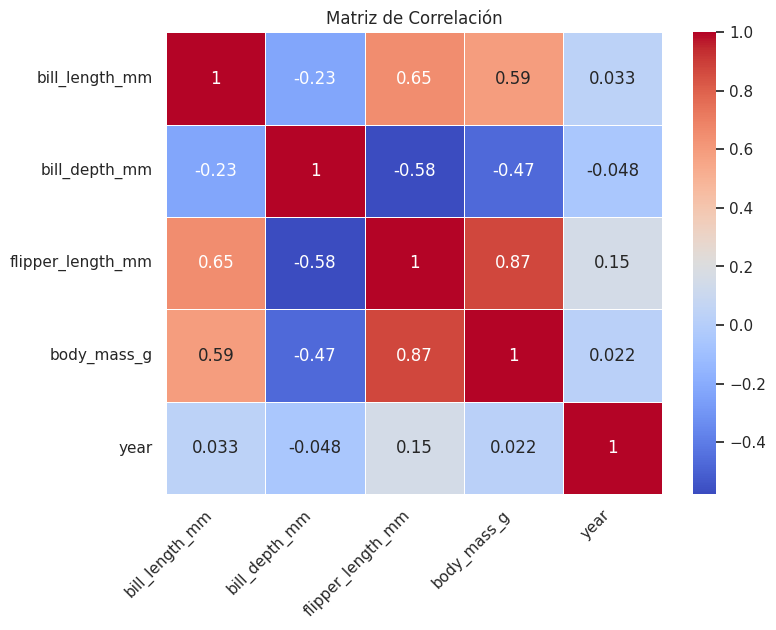

In [411]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()


#Análisis de Componentes Principales (PCA)

In [412]:
# Crear un nuevo DataFrame sin las columnas 'species', 'island' y 'sex'
penguins_numbers = penguins.drop(['species', 'island', 'sex'], axis=1).copy()

# Eliminar filas con valores NaN en penguins_numbers
penguins_numbers = penguins_numbers.dropna()

penguins_numbers = penguins_numbers.reset_index(drop=True)

variables = list(penguins_numbers.columns)

#Se estandarizan los datos
standardized_penguins = StandardScaler().fit_transform(penguins_numbers)

standardized_penguins_df = pd.DataFrame(
    StandardScaler().fit_transform(penguins_numbers),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in variables],  # Nombres de columnas estandarizadas
    index=penguins_numbers.index  # Índices (etiquetas de filas) del DataFrame
)

print(variables)
print(standardized_penguins)
display(standardized_penguins_df)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
[[-0.89604189  0.7807321  -1.42675157 -0.56847478 -1.28374201]
 [-0.82278787  0.11958397 -1.06947358 -0.50628618 -1.28374201]
 [-0.67627982  0.42472926 -0.42637319 -1.1903608  -1.28374201]
 ...
 [ 1.02687621  0.52644436 -0.56928439 -0.53738048  1.18015476]
 [ 1.24663828  0.93330475  0.64546078 -0.13315457  1.18015476]
 [ 1.13675725  0.7807321  -0.2120064  -0.53738048  1.18015476]]


,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,year_z
0,-0.896042,0.780732,-1.426752,-0.568475,-1.283742
1,-0.822788,0.119584,-1.069474,-0.506286,-1.283742
2,-0.676280,0.424729,-0.426373,-1.190361,-1.283742
3,-1.335566,1.085877,-0.569284,-0.941606,-1.283742
4,-0.859415,1.747026,-0.783651,-0.692852,-1.283742
...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,1.180155
329,-0.090248,0.475587,0.073816,-1.003795,1.180155
330,1.026876,0.526444,-0.569284,-0.537380,1.180155
331,1.246638,0.933305,0.645461,-0.133155,1.180155


In [413]:
# Crea una instancia de Análisis de Componentes Principales (PCA):
pca = PCA(n_components=4)
fit = pca.fit(standardized_penguins)

In [414]:
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_

# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada = fit.explained_variance_ratio_

# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)

In [415]:
autovalores

array([2.76378209, 1.00377186, 0.77929953, 0.36967575])

In [416]:
var_explicada

array([0.55109649, 0.20015151, 0.15539186, 0.07371312])

In [417]:
# Crear un DataFrame de pandas con los datos anteriores y establecer índice
data = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)])
tabla

,Autovalores,Variabilidad Explicada,Variabilidad Acumulada
Componente 1,2.763782,0.551096,0.551096
Componente 2,1.003772,0.200152,0.751248
Componente 3,0.779300,0.155392,0.906640
Componente 4,0.369676,0.073713,0.980353


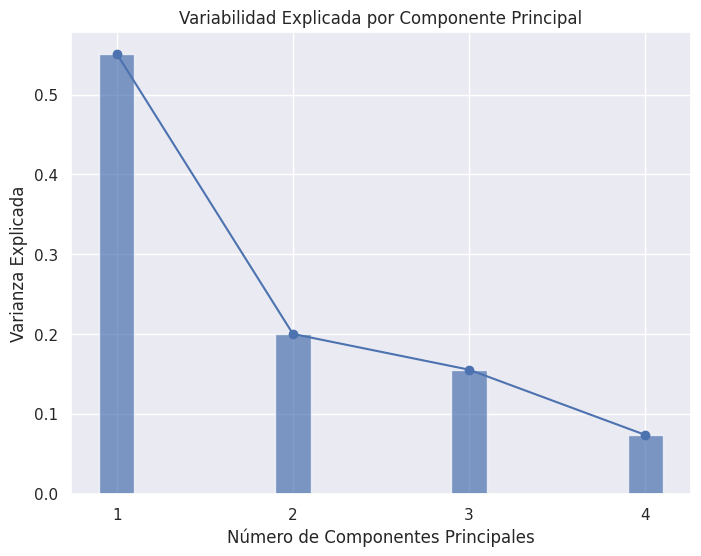

In [418]:
plot_varianza_explicada(var_explicada , fit.n_components_)

#Por lo tanto, optamos por retener únicamente 2 de las 4 componentes principales,
#las cuales explican conjuntamente el (55,40+19,87=75,87) 75,87% de la varianza de las variables originales.

###PCA indicando el número de componentes principales

In [419]:

# Crear una instancia de ACP con las dos primeras componentes principales
pca = PCA(n_components=2)
fit = pca.fit(standardized_penguins)

# Obtener los autovectores asociados a cada componente principal y transponerlos
autovectores = pd.DataFrame(pca.components_.T,
                            columns=['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index=['{}_z'.format(variable) for variable in variables])
autovectores

,Autovector 1,Autovector 2
bill_length_mm_z,0.451542,0.099588
bill_depth_mm_z,-0.397871,0.006024
flipper_length_mm_z,0.577293,-0.039128
body_mass_g_z,0.546622,0.100618
year_z,0.075806,-0.989136


In [420]:
# Crea una instancia de ACP con las dos primeras componentes que nos interesan y aplícala a los datos
pca = PCA(n_components=2)
fit = pca.fit(standardized_penguins)

# Obtén los autovectores asociados a cada componente principal y transpónlos
autovectores = pd.DataFrame(pca.components_.T,
                            columns=['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index=['{}_z'.format(variable) for variable in variables])
autovectores

,Autovector 1,Autovector 2
bill_length_mm_z,0.451542,0.099588
bill_depth_mm_z,-0.397871,0.006024
flipper_length_mm_z,0.577293,-0.039128
body_mass_g_z,0.546622,0.100618
year_z,0.075806,-0.989136


In [421]:
display(standardized_penguins_df)
print('-----------------------------------------------------------------------------------')
print(standardized_penguins)

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,year_z
0,-0.896042,0.780732,-1.426752,-0.568475,-1.283742
1,-0.822788,0.119584,-1.069474,-0.506286,-1.283742
2,-0.676280,0.424729,-0.426373,-1.190361,-1.283742
3,-1.335566,1.085877,-0.569284,-0.941606,-1.283742
4,-0.859415,1.747026,-0.783651,-0.692852,-1.283742
...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,1.180155
329,-0.090248,0.475587,0.073816,-1.003795,1.180155
330,1.026876,0.526444,-0.569284,-0.537380,1.180155
331,1.246638,0.933305,0.645461,-0.133155,1.180155


-----------------------------------------------------------------------------------
[[-0.89604189  0.7807321  -1.42675157 -0.56847478 -1.28374201]
 [-0.82278787  0.11958397 -1.06947358 -0.50628618 -1.28374201]
 [-0.67627982  0.42472926 -0.42637319 -1.1903608  -1.28374201]
 ...
 [ 1.02687621  0.52644436 -0.56928439 -0.53738048  1.18015476]
 [ 1.24663828  0.93330475  0.64546078 -0.13315457  1.18015476]
 [ 1.13675725  0.7807321  -0.2120064  -0.53738048  1.18015476]]


In [422]:
# Crear un DataFrame con los resultados de la transformación PCA
resultados_pca = pd.DataFrame(fit.transform(standardized_penguins),
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=standardized_penguins_df.index)

# # Concatenar los DataFrames
notas_z_cp = pd.concat([standardized_penguins_df, resultados_pca], axis=1)
notas_z_cp

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,year_z,Componente 1,Componente 2
0,-0.896042,0.780732,-1.426752,-0.568475,-1.283742,-1.946941,1.183892
1,-0.822788,0.119584,-1.069474,-0.506286,-1.283742,-1.410564,1.179482
2,-0.676280,0.424729,-0.426373,-1.190361,-1.283742,-1.468491,1.101917
3,-1.335566,1.085877,-0.569284,-0.941606,-1.283742,-1.975765,1.070864
4,-0.859415,1.747026,-0.783651,-0.692852,-1.283742,-2.011592,1.155682
...,...,...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,1.180155,0.640720,-0.986700
329,-0.090248,0.475587,0.073816,-1.003795,1.180155,-0.646592,-1.277345
330,1.026876,0.526444,-0.569284,-0.537380,1.180155,-0.278704,-1.093693
331,1.246638,0.933305,0.645461,-0.133155,1.180155,0.580872,-1.076215


###Cálculo de las correlaciones entre las variables originales y las componentes seleccionadas

In [423]:
# Guardamos el nombre de las variables del archivo conjunto (variables y componentes).
variables_cp = notas_z_cp.columns

# Calculamos las correlaciones y seleccionamos las que nos interesan (variables contra componentes).
correlacion = pd.DataFrame(np.corrcoef(standardized_penguins.T, resultados_pca.T),
                           index=variables_cp, columns=variables_cp)

# Extraemos el número de variables originales del modelo PCA ajustado.
n_variables = fit.n_features_

# Seleccionamos las correlaciones entre las variables originales y las componentes principales.
correlaciones_penguins_con_cp = correlacion.iloc[:fit.n_features_, fit.n_features_:]
correlaciones_penguins_con_cp

,Componente 1,Componente 2
bill_length_mm_z,0.749543,0.099626
bill_depth_mm_z,-0.660452,0.006026
flipper_length_mm_z,0.958286,-0.039143
body_mass_g_z,0.907373,0.100656
year_z,0.125836,-0.989511


In [424]:
cos2 = correlaciones_penguins_con_cp **2
cos2

,Componente 1,Componente 2
bill_length_mm_z,0.561815,0.009925
bill_depth_mm_z,0.436196,0.000036
flipper_length_mm_z,0.918311,0.001532
body_mass_g_z,0.823325,0.010132
year_z,0.015835,0.979132


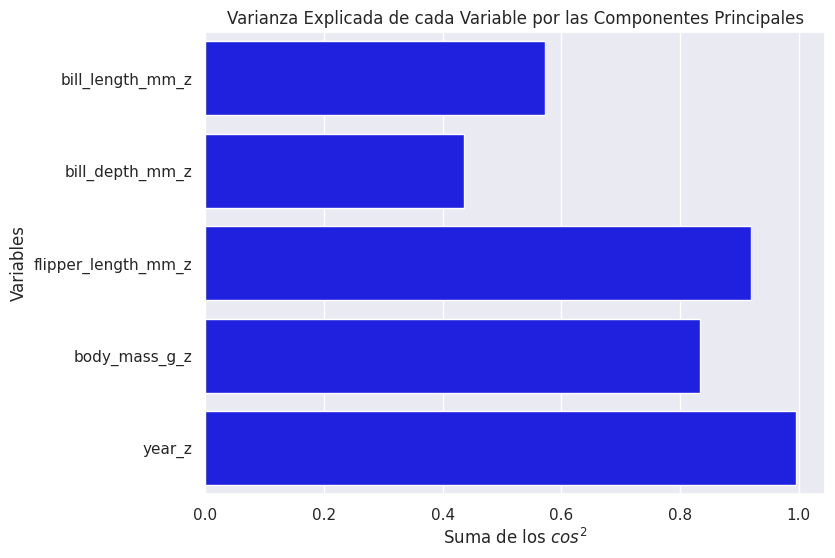

In [425]:
plot_cos2_bars(cos2)

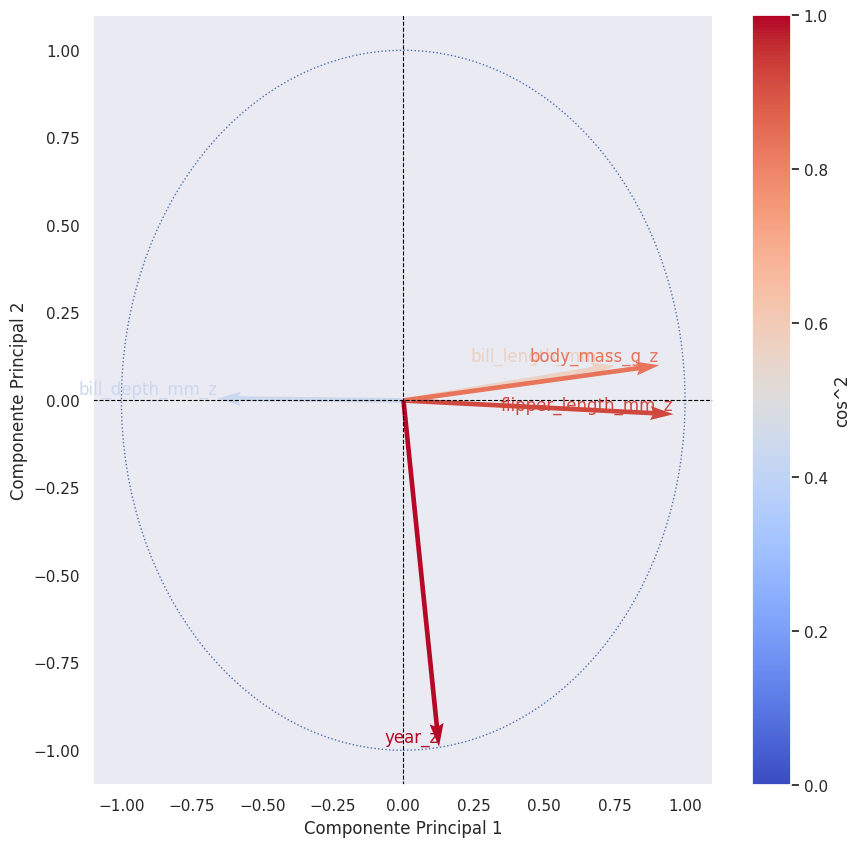

In [426]:
plot_corr_cos(fit.n_components , correlaciones_penguins_con_cp)

###Coordenadas de los individuos en los nuevos ejes

In [427]:
# Indexamos las componentes principales a la base de datos original.
penguins_cp = pd.concat([penguins, resultados_pca], axis=1)
penguins_cp

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Componente 1,Componente 2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,-1.946941,1.183892
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,-1.410564,1.179482
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,-1.468491,1.101917
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,-1.975765,1.070864
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,-2.011592,1.155682
...,...,...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,0.640720,-0.986700
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,-0.646592,-1.277345
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,-0.278704,-1.093693
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,0.580872,-1.076215


In [428]:
print(pca)
print('------------------------------------------------------------')
print(standardized_penguins)
print('------------------------------------------------------------')
print(fit.n_components)

PCA(n_components=2)
------------------------------------------------------------
[[-0.89604189  0.7807321  -1.42675157 -0.56847478 -1.28374201]
 [-0.82278787  0.11958397 -1.06947358 -0.50628618 -1.28374201]
 [-0.67627982  0.42472926 -0.42637319 -1.1903608  -1.28374201]
 ...
 [ 1.02687621  0.52644436 -0.56928439 -0.53738048  1.18015476]
 [ 1.24663828  0.93330475  0.64546078 -0.13315457  1.18015476]
 [ 1.13675725  0.7807321  -0.2120064  -0.53738048  1.18015476]]
------------------------------------------------------------
2


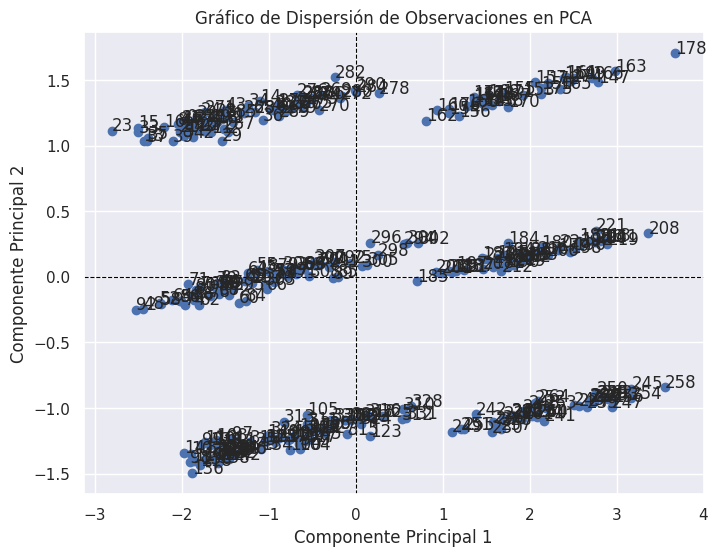

In [429]:
plot_pca_scatter(pca, standardized_penguins_df , fit.n_components)

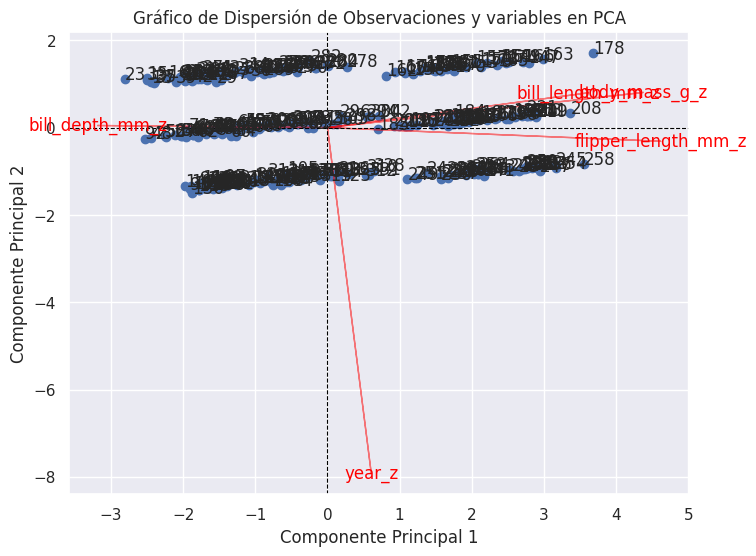

In [430]:
plot_pca_scatter_with_vectors(pca, standardized_penguins_df, fit.n_components, fit.components_)

#Clustering

###Determinar el número de grupos

In [431]:
penguins_clustering = penguins.copy()
penguins_clustering

penguins_clustering_data = penguins_clustering.drop(columns=['species', 'island', 'sex'])
display(penguins_clustering_data)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
3,36.7,19.3,193.0,3450.0,2007
4,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...
328,55.8,19.8,207.0,4000.0,2009
329,43.5,18.1,202.0,3400.0,2009
330,49.6,18.2,193.0,3775.0,2009
331,50.8,19.0,210.0,4100.0,2009


In [432]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame to standardize the columns
df = pd.DataFrame(scaler.fit_transform(penguins_clustering_data), columns=penguins_clustering_data.columns)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,-0.896042,0.780732,-1.426752,-0.568475,-1.283742
1,-0.822788,0.119584,-1.069474,-0.506286,-1.283742
2,-0.676280,0.424729,-0.426373,-1.190361,-1.283742
3,-1.335566,1.085877,-0.569284,-0.941606,-1.283742
4,-0.859415,1.747026,-0.783651,-0.692852,-1.283742
...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,1.180155
329,-0.090248,0.475587,0.073816,-1.003795,1.180155
330,1.026876,0.526444,-0.569284,-0.537380,1.180155
331,1.246638,0.933305,0.645461,-0.133155,1.180155


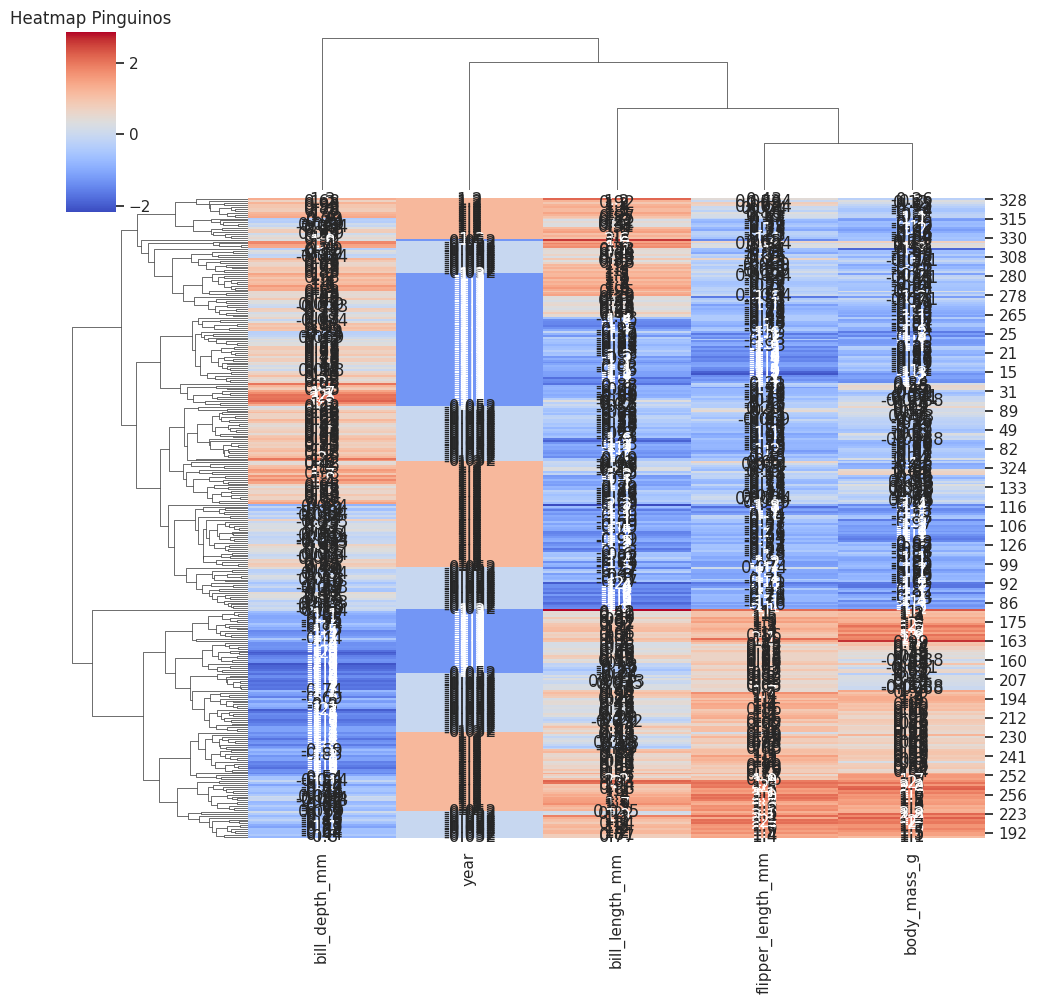

In [433]:
# Create the heatmap
sns.clustermap(df, cmap='coolwarm', annot=True)
plt.title('Heatmap Pinguinos')
plt.show()

In [434]:
# Calculate the pairwise Euclidean distances
distance_matrix = distance.cdist(df, df, 'euclidean')

# The distance_matrix is a 2D array containing the Euclidean distances between all pairs of observations.
distance_small = distance_matrix[:5, :5]

# Index are added to the distance matrix
distance_small = pd.DataFrame(distance_small, index=df.index[:5], columns=df.index[:5])

distance_small_rounded = distance_small.round(2)

print("Distance Matrix:\n")
display(distance_small_rounded)

Distance Matrix:



,0,1,2,3,4
0,0.00,0.76,1.25,1.08,1.17
1,0.76,0.00,1.00,1.28,1.66
2,1.25,1.00,0.00,0.98,1.47
3,1.08,1.28,0.98,0.00,0.88
4,1.17,1.66,1.47,0.88,0.00


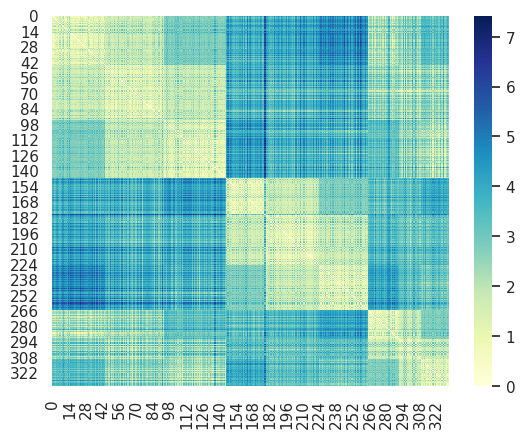

In [435]:
# plt.figure(figsize=(24, 6))
df_distance = pd.DataFrame(distance_matrix, index = df.index, columns = df.index)
sns.heatmap(df_distance, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()

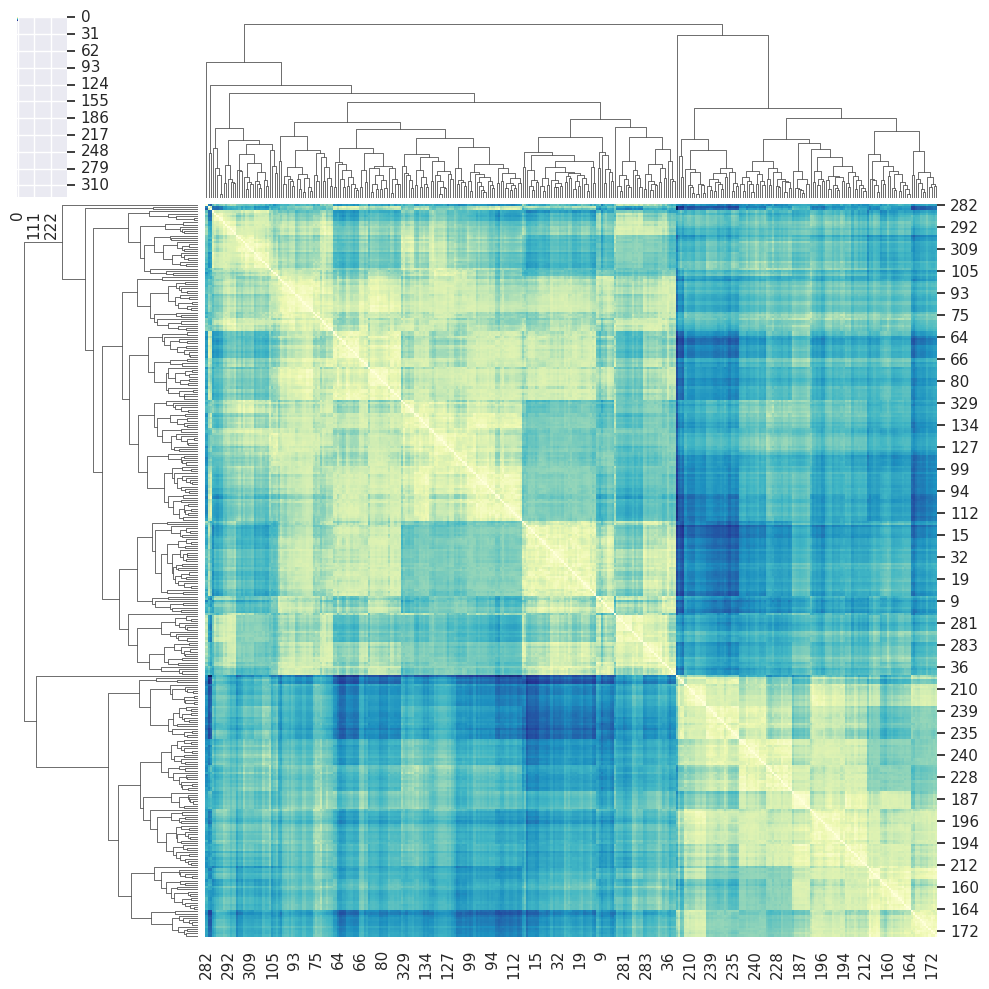

In [436]:
# Perform hierarchical clustering to get the linkage matrix
linkage = sns.clustermap(df_distance, cmap="YlGnBu", fmt=".1f", annot=False, method='average').dendrogram_row.linkage

# Reorder the data based on the hierarchical clustering
order = pd.DataFrame(linkage, columns=['cluster_1', 'cluster_2', 'distance', 'new_count']).index
reordered_data = df.reindex(index=order, columns=order)

# Optionally, you can add color bar
sns.heatmap(reordered_data, cmap="YlGnBu", fmt=".1f", cbar=False)
plt.show()


#Al observar el dendograma, decido que hay 3 grupos.

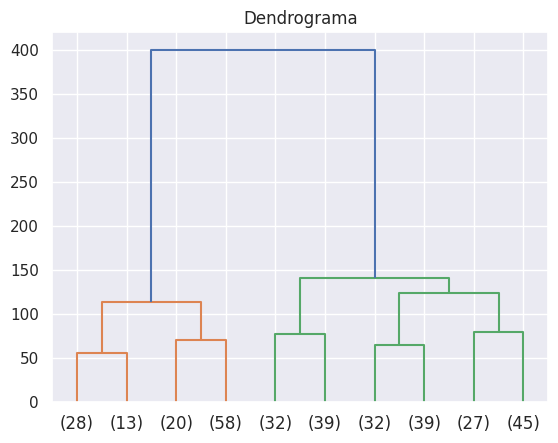

In [437]:
#Transformar df_distance a df -df_distance,           df                      penguins_clustering_data
#Transformar df_distance a df -distance_std,           df_std                      df

df_std_distance = pd.DataFrame(df_distance , index = df.index ,columns = penguins_clustering_data.index)

# Calculate the linkage matrix
linkage_matrix = sch.linkage(df_std_distance, method='ward')  # You can choose a different linkage method if needed

# Create the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title('Dendrograma')
plt.show()



#Según el dendograma se diferencian 3 colores, seleccionamos 4 grupos y podríamos escoger la línea de corte alrededor de 125.

###Agrupamiento K-means

###Diferentes valores de k




--------------------------------------------------


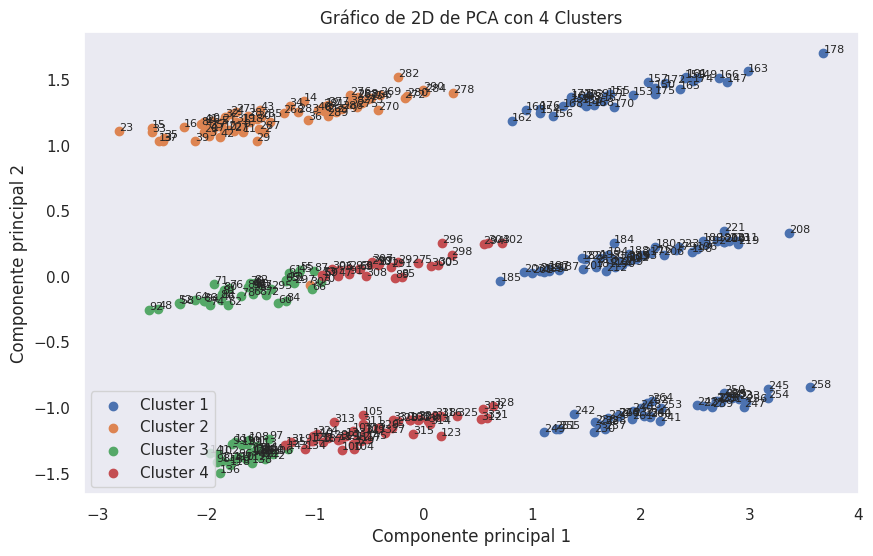

--------------------------------------------------


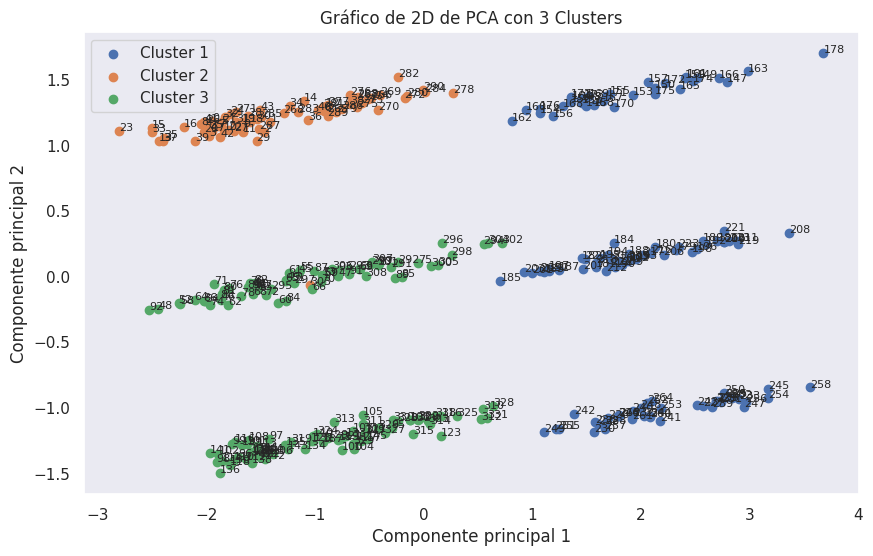

--------------------------------------------------


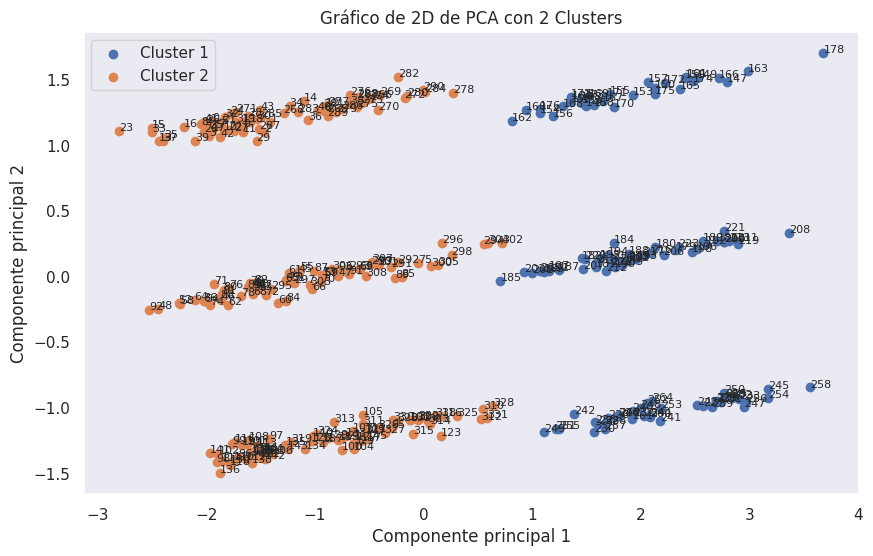

In [438]:
def plot_pca_and_clusters(df, linkage_matrix, num_clusters):
    # Step 1: Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df)

    # Create a new DataFrame for the 2D principal components
    df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    print('--------------------------------------------------')

    # Step 2: Create a scatter plot with colors for clusters
    plt.figure(figsize=(10, 6))

    # Cluster assignments
    cluster_assignments = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    # Loop through unique cluster assignments and plot data points with the same color
    for cluster in np.unique(cluster_assignments):
        plt.scatter(df_pca.loc[cluster_assignments == cluster, 'PC1'],
                    df_pca.loc[cluster_assignments == cluster, 'PC2'],
                    label=f'Cluster {cluster}')

    # Add labels to data points
    for i, row in df_pca.iterrows():
        plt.text(row['PC1'], row['PC2'], str(df.index[i]), fontsize=8)

    plt.title(f"Gráfico de 2D de PCA con {num_clusters} Clusters")
    plt.xlabel("Componente principal 1")
    plt.ylabel("Componente principal 2")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:

# Plot with 4 clusters
plot_pca_and_clusters(df, linkage_matrix, num_clusters=4)

# Plot with 3 clusters
plot_pca_and_clusters(df, linkage_matrix, num_clusters=3)

# Plot with 2 clusters
plot_pca_and_clusters(df, linkage_matrix, num_clusters=2)


###Método del codo

In [439]:
#Create an array to store the WCSS values for different values of K:
wcss = []

for k in range(1, 11):  # You can choose a different range of K values
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

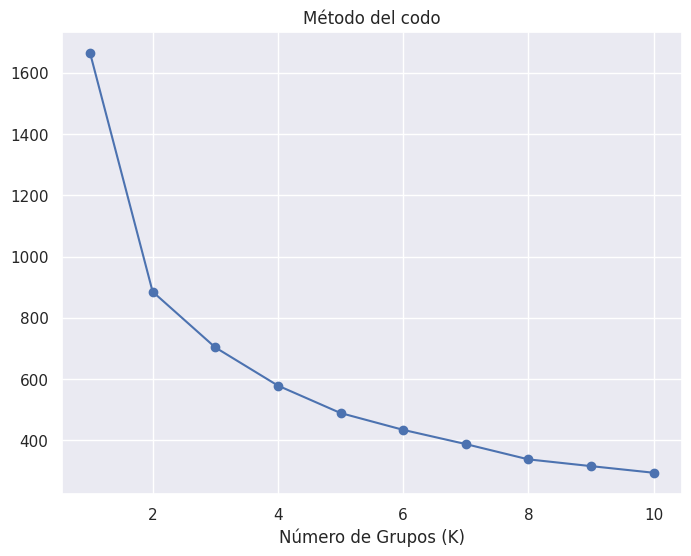

In [440]:
# Graficar los valores de WCSS frente al número de grupos (K)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Método del codo')
plt.xlabel('Número de Grupos (K)')
plt.show()

###Método de la silueta

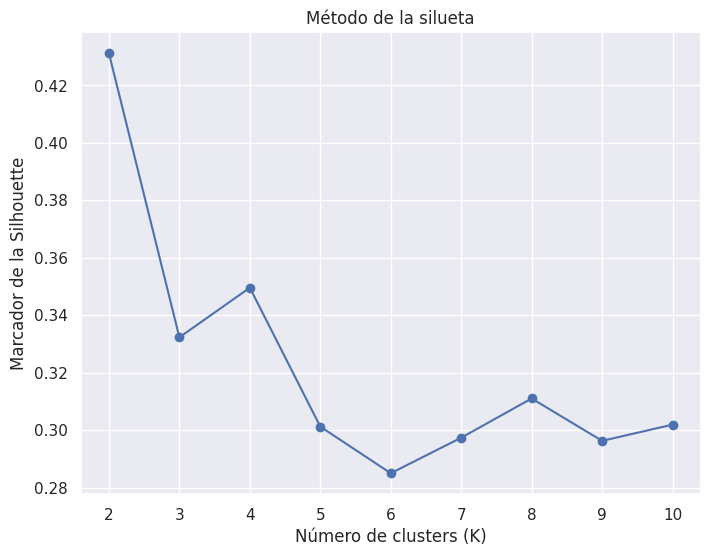

In [441]:
#Create an array to store silhouette scores for different values of K
silhouette_scores = []

#Run K-means clustering for a range of K values and calculate the silhouette score for each K:

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Método de la silueta')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Marcador de la Silhouette')
plt.grid(True)
plt.show()


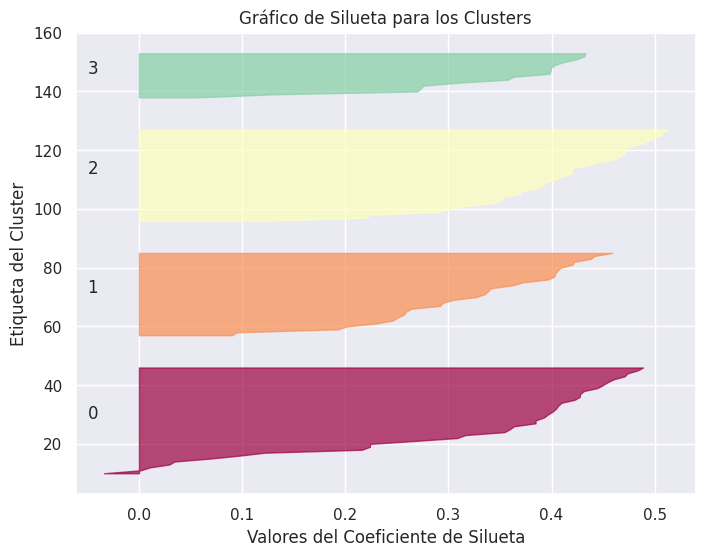

In [442]:
# Calculates silhouette scores for each cluster
silhouette_values = silhouette_samples(df, labels)
plt.figure(figsize=(8, 6))

y_lower = 10

for i in range(4):
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / 4)

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

plt.title("Gráfico de Silueta para los Clusters")
plt.xlabel("Valores del Coeficiente de Silueta")
plt.ylabel("Etiqueta del Cluster")
plt.grid(True)
plt.show()


In [443]:
# Add the labels as a new column to the DataFrame
df['label'] = labels
# Sort the DataFrame by the "label" column
df_std_sort = df.sort_values(by="label")
df_std_sort

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,label
198,1.118444,-1.100997,1.717295,0.986240,-0.051794,0
245,2.180627,-0.083846,1.931662,1.732503,1.180155,0
243,1.301579,-0.338134,1.717295,1.297183,1.180155,0
240,0.990249,-0.694137,1.074194,0.892957,1.180155,0
239,1.246638,-0.744994,1.788750,1.234995,1.180155,0
...,...,...,...,...,...,...
288,1.210011,1.136735,-0.569284,-0.506286,-1.283742,9
289,0.495785,0.373872,-0.426373,-1.128172,-1.283742,9
290,1.466400,0.933305,-0.283462,-0.070966,-1.283742,9
267,1.338206,1.035020,-0.569284,-0.692852,-1.283742,9


In [444]:
# Group the data by the 'label' column and calculate the mean of each group
cluster_centroids = df_std_sort.groupby('label').mean()

# 'cluster_centroids' now contains the centroids of each cluster
cluster_centroids_rounded = cluster_centroids.round(2)

cluster_centroids_rounded


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
label,,,,,
0,1.21,-0.58,1.65,1.65,0.61
1,-1.30,0.19,-0.91,-0.99,-0.05
2,0.50,-1.29,0.98,1.07,-1.28
3,1.35,1.20,0.28,-0.05,0.64
4,-0.94,0.76,-1.05,-0.67,-1.28
5,-1.09,0.11,-0.86,-1.03,1.18
6,0.72,0.32,-0.42,-0.81,0.72
7,-0.59,0.97,-0.42,-0.11,0.51
8,0.35,-1.37,0.92,0.71,0.44
